# CMSC320 Final Project
Written by Dalton Herrold and Joshua Choi

## Introduction
League of Legends, developed by Riot Games, is the most popular game in the world with a peak of over 8 million players being logged in at the same time everyday. The true daily number of players is certainly much greater than this.  In this game, there are two teams, red and blue, each consisting of 5 players. Each teams goal is to destroy the other team's home base. The team that does so first wins the game. League of Legends games can be quite long since, as long as both teams base stand, the game continues. The average game length according to Riot Games is somewhere around 30 minutes.

Before the game starts, each player in the game must pick a unique [champion](https://leagueoflegends.fandom.com/wiki/Champion). Currently there are 152 champions in the game to choose from, but that number increases often as Riot constantly introduces new champions to the game. The game gets complex fast as beyond the 10 champions that are in the game (5 on your team and 5 on the other), there are many systems to keep in mind such as the economy system to purchase items, experience system to allow your champion access to more powerful abilities, and neutral objectives that grant powerful effects.

## League of Legends Diamond Ranked Games

There is a ranked system in the game consisting of Iron, Bronze, Silver, Gold, Platinum, Diamond, Masters, and Challenger. To see the full ranked distribution, check out this site: https://www.leagueofgraphs.com/rankings/rank-distribution
We will be looking at a dataset consisting of statistics from the first 10 minutes of Diamond ranked North American solo games. We are going to try and see if the first 10 minutes dictates the outcome of the game as well as which statistics are the best estimators for the game outcome.

Diamond players are considered to be in the top 2.4% of players according to the resource mentioned before, meaning that their understanding of the game is deep and they typically make high impact decisions that are likely to go well for them. As such, we believe that tracking their behaviors and seeing what leads to wins in their games is an accurate way to determine who will win a game of League of Legends.

For people who do not know very much about League of Legends, this should be a great way to generate interest in the game for them and show exploratory data analysis in a unique fashion. For those who have experience in playing League of Legends, this should hopefully serve as a rough outline on what your team should prioritize in order to climb the ranks and succeed. For those who are unfamiliar with the game, we recommend this resource to check out to get a basic understanding: https://leagueoflegends.fandom.com/wiki/League_of_Legends_Wiki.

## Data Analysis
For this section, we will be taking advantage of the following libraries: pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import the needed libraries for this section of the tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let us see the entire width of the dataset when printed
pd.set_option('display.max_columns', 50)
# Make our plots look a little better
plt.style.use('ggplot')

For this tutorial, we have done no preprocessing to the data, and will be going through the steps of getting it ready to train ML models just like you normally would. 

First thing's first, lets get the dataset into python and take a thorough look around it.

In [2]:
# Read the dataset from within the same directory as the notebook
games = pd.read_csv("high_diamond_ranked_10min.csv", sep=',')
games.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

We can see that we are working with 40 colums here, which is quite a lot. Let's take a look at each column and see if there are any we can eliminate right off the bat.

 - gameId - The ID of the game we can use to get more statistics from the League of Legends API.
 - blueWins - A boolean representing if the blue won. If the value is 1 then the blue team won.
 - blueWardsPlaced - Int representing the number of "[wards](https://leagueoflegends.fandom.com/wiki/Ward)" (totems that grant vision) blue team placed over the game. 
 - blueWardsDestroyed - Int representing the number of "wards" the blue team has destroyed.
 - blueFirstBlood - A boolean representing if blue team got "first blood", the first kill of a game.
 - blueKills - Int representing the number of kills the blue team obtained.
 - blueDeaths - Int representing the number of deaths the blue team had.
 - blueAssists - Int representing the number of assists the blue team had.
 - blueEliteMonsters - Int representing the number of high-priority neutral monsters the blue team destroyed.
 - blueDragons - Int representing the number of times the blue team obtained [dragon](https://leagueoflegends.fandom.com/wiki/dragon).
 - blueHeralds - Int representing the number of times the blue team obtained [rift herald](https://leagueoflegends.fandom.com/wiki/Rift_Herald_(League_of_Legends))
 - blueTowersDestroyed - Int representing the number of towers the blue team destroyed.
 - blueTotalGold - Int representing the total number of gold the blue team gained over the course of the game.
 - blueAvgLevel - Float representing the average level of blue team at the time of conceding.
 - blueTotalExperience - Int representing the total amount of experience gained by blue team.
 - blueTotalMinionsKilled - Int representing the number of minions killed by blue team.
 - blueTotalJungleMinionsKilled - Int representing the number of jungle monsters killed by blue team.
 - blueGoldDiff - Int representing the gold difference of blue team from red team.
 - blueExperienceDiff - Int representing the experience difference of blue team from red team.
 - blueCSPerMin - Float representing the amount of [CS](https://leagueoflegends.fandom.com/wiki/Farming) of blue team.
 - blueGoldPerMin - Float representing the amount of gold gained/minute of blue team.
 
There are duplicates of all variables prefixied with blue for the red team (prefixed with read instead). However, to avoid redundancy and unecessary explanations, I am not going to write them here.

## Data Wrangling

In this section we are going to clean up the data and "wrangle" it to be more consise and better structured. This data wrangling is important as, if done correctly, it will improve the results, and speed of training, of our ML algorithms later. Part of this process is eliminating unecessary columns.

The only column that it seems like we can eliminate off the bat is the gameID column. The gameID column corresponds to the Leage of Legends API reference to the game. Utilizing this number, we could request more information from the API. Since we will only be working with the data from the dataset, we will remove this column since it has no effect on whether or not a game is won or not. So, lets remove it!

In [3]:
# Dropping the gameID column
games.drop(['gameId'], axis=1, inplace=True)
games.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0                  -8          19.5          1721.0              15   
1               -1173          17.4          1471.2              12   
2               -1033          18.6          1611.3              15   
3                  -7          20.1          1515.7              15   
4                 230          21.0          1640.0              17   

   redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  \
0                  6              0         6          9           8   
1                  1              1         5          5           2   
2                  3              1        11          7          14   
3                  2              1         5          4          10   
4                  2              1         6          6           7   

   redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  \
0                 0           0           0                   0         16567   
1                 2           1           1                   1         17620   
2                 0           0           0                   0         17285   
3                 0           0           0                   0         16478   
4                 1           1           0                   0         17404   

   redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0          6.8               17047                    197   
1          6.8               17438                    240   
2          6.8               17254                    203   
3          7.0               17961                    235   
4          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         2

Upon closer inspection of the data columns, it seems like certain columns may be a direct linear combination of other columns. For example, total experience and average level should be directly related. Aditionally, CSPerMin and TotalMinionsKilled should be directly related. This is the same with total gold and gold per minute. We want to look at getting rid of these as they could bias our algorithm toward a particular feature. 

Let me explain that a little further. If we were to keep two features that were the same, say total experience and average level. If these two were indeed the same, then by keeping both in our algorithm we are putting more weight on the experience than we are other features since there are two features for experience. Since we don't want a particular feature to be weighted higher than another, we will try and remove all of these features which are linearly correlated. 

Let's go ahead and take a closer look at total experience and average level and see if we can conclusively say that they are linearly correlated, and if so, remove one of them.

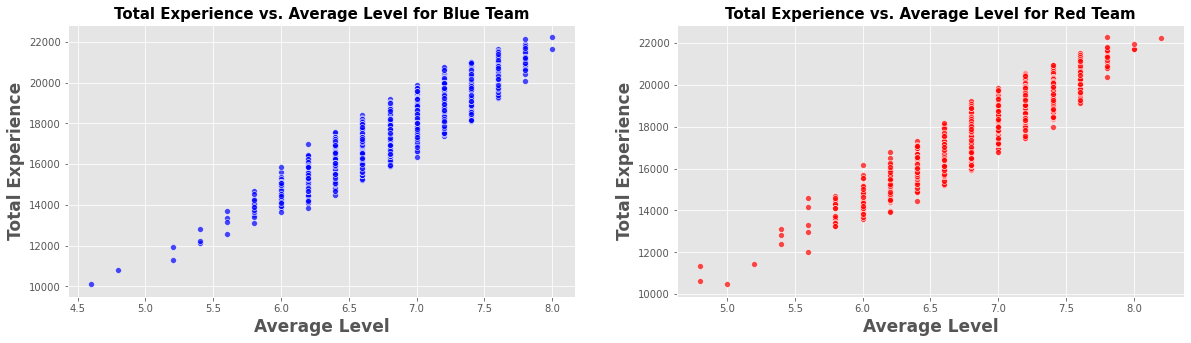

In [4]:
# Creating the plot
plt.figure(figsize=(20, 5))

# Plotting for blue team on the left subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x=games['blueAvgLevel'], y=games['blueTotalExperience'], alpha=0.7, color=["blue"])
# Labeling the axises
plt.xlabel('Average Level', fontsize=17, fontweight='bold')
plt.ylabel('Total Experience', fontsize=17, fontweight='bold')
plt.title('Total Experience vs. Average Level for Blue Team', fontsize=15, fontweight='bold')

# Plotting for red team on the right subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=games['redAvgLevel'], y=games['redTotalExperience'], alpha=0.7, color=["red"])
# Labeling the axises
plt.xlabel('Average Level', fontsize=17, fontweight='bold')
plt.ylabel('Total Experience', fontsize=17, fontweight='bold')
plt.title('Total Experience vs. Average Level for Red Team', fontsize=15, fontweight='bold')

plt.show()

As we can see, there is quite obviously a positive linear relationship between total experience and average level. In fact, it seem as though they are probably the same thing, just average level seems binned and therefore, less acurate. For this reason, we are going to remove average level for both the blue and red teams. We will leave total experience in tact since it is more presise. 

In [5]:
# Dropping both red and blue average level
games.drop(['redAvgLevel', 'blueAvgLevel'], axis=1, inplace=True)

Now lets take a look at if there is a correlation between average CS per minute and total minions killed. Once again, it seems obvious that there should be, but it would be a bad idea to assume without checking. 

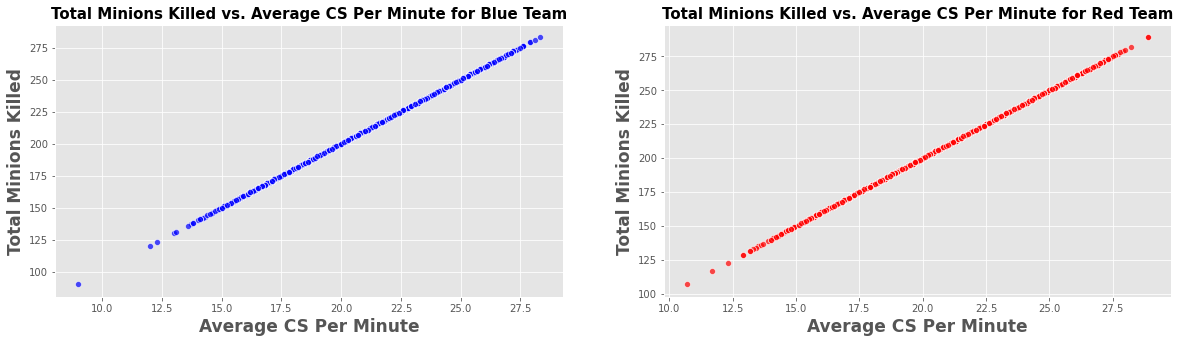

In [6]:
# Creating a new plot
plt.figure(figsize=(20, 5))

# Plotting for blue team on the left subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x=games['blueCSPerMin'], y=games['blueTotalMinionsKilled'], alpha=0.7, color=["blue"])
plt.xlabel('Average CS Per Minute', fontsize=17, fontweight='bold')
plt.ylabel('Total Minions Killed', fontsize=17, fontweight='bold')
plt.title('Total Minions Killed vs. Average CS Per Minute for Blue Team', fontsize=15, fontweight='bold')

# Plotting for red team on the right subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=games['redCSPerMin'], y=games['redTotalMinionsKilled'], alpha=0.7, color=["red"])
plt.xlabel('Average CS Per Minute', fontsize=17, fontweight='bold')
plt.ylabel('Total Minions Killed', fontsize=17, fontweight='bold')
plt.title('Total Minions Killed vs. Average CS Per Minute for Red Team', fontsize=15, fontweight='bold')

plt.show()

Wow, that is a linear combination right there. Since it forms a perfect line, looking at the axes, we can determine that average CS per minute is most likely just total minions divided by 10 (since this is the first 10 minutes of the game). For this reason we will remove one of these features. Since it is a perfect linear combination, it shouldn't matter what feature we delete here, but we are going to delete the average CS per minute feature for both red and blue. This is because we will do our own data scaling later and it might be a tad better to start with the origonal total CS values.

In [7]:
# Dropping the average cs per minute for both red and blue teams
games.drop(['blueCSPerMin', 'redCSPerMin'], axis=1, inplace=True)

Last but not least, let's take a look at total gold vs gold per minute. I suspect that this will look very similar to total CS vs average CS, but we won't know until we look at the graph.

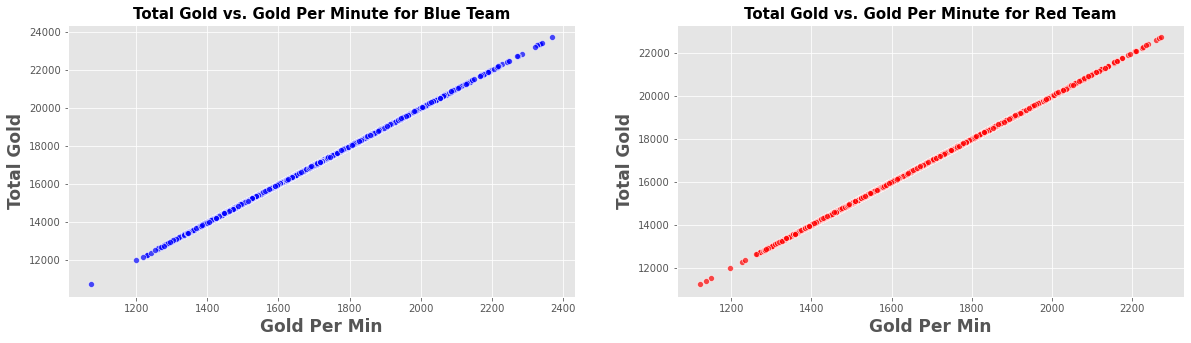

In [8]:
# Creating a new plot
plt.figure(figsize=(20, 5))

# Plotting for blue team on the left subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x=games['blueGoldPerMin'], y=games['blueTotalGold'], alpha=0.7, color=["blue"])
plt.xlabel('Gold Per Min', fontsize=17, fontweight='bold')
plt.ylabel('Total Gold', fontsize=17, fontweight='bold')
plt.title('Total Gold vs. Gold Per Minute for Blue Team', fontsize=15, fontweight='bold')

# Plotting for red team on the right subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=games['redGoldPerMin'], y=games['redTotalGold'], alpha=0.7, color=["red"])
plt.xlabel('Gold Per Min', fontsize=17, fontweight='bold')
plt.ylabel('Total Gold', fontsize=17, fontweight='bold')
plt.title('Total Gold vs. Gold Per Minute for Red Team', fontsize=15, fontweight='bold')

plt.show()

Once again these columns are perfect linear combinations, with gold per minute appearing to be total gold divided by 10. For the exact same reason as the last feature we looked at, we are going to drop gold per minute for both the red and the blue team.

In [9]:
# Dropping the average gold per minute for both red and blue teams
games.drop(['redGoldPerMin', 'blueGoldPerMin'], axis=1, inplace=True)

Whew, that was a lot of hard work! Before doing any more analysis, let's take a step back and admire the work that we have done so far.

In [10]:
games.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueTotalExperience  \
0                    0          17210                17039   
1                    0          14712                16265   
2                    0          16113                16221   
3                    0          15157                17954   
4                    0          16400                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  redWardsPlaced  redWardsDestroyed  redFirstBlood  \
0                  -8              15                  6              0   
1               -1173              12                  1              1   
2               -1033              15                  3              1   
3                  -7              15                  2              1   
4                 230              17                  2              1   

   redKills  redDeaths  redAssists  redEliteMonsters  redDragons  redHeralds  \
0         6          9           8                 0           0           0   
1         5          5           2                 2           1           1   
2        11          7          14                 0           0           0   
3         5          4          10                 0           0           0   
4         6          6           7                 1           1           0   

   redTowersDestroyed  redTotalGold  redTotalExperience  \
0                   0         16567               17047   
1                   1         17620               17438   
2                   0         17285               17254   
3                   0         16478               17961   
4                   0         17404               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  
0                  8  
1               1173  
2               1033  
3                  7  
4               -230

This is looking pretty good so far! However, there is still some more work to be done to it. Taking a look at the dataset, there seems to be 2 more features that we can eliminate easily without reducing the utility of the dataset. The features in question are redGoldDiff and redExperienceDiff since the are just the negation of the features blueGoldDiff and blueExperienceDiff. There is no need to have extra complexity in our model for these features since they have already been accounted for once.

In [11]:
# Removing the two features that are redundant
games.drop(['redGoldDiff', 'redExperienceDiff'], axis=1, inplace=True)

Upon further inspection of the dataset, it appears that we can also drop the features blueEliteMonsters and redEliteMonsters. This is because this feature is just a sum of the number of dragons and Rift Heralds that a team has killed. Since we already have two features for these epic monsters separatly, there is no reason to keep a total counter of all of them together.

In [12]:
# Dropping the two unecessary features
games.drop(['blueEliteMonsters', 'redEliteMonsters'], axis=1, inplace=True)

We can also get rid of the features redTotalExperience and blueTotalExperience since we have blueExperienceDiff which already takes into account both variables and displays the data in a better, cleaner way for later training. This also applies to TotalGold for each team for the same reason, so we will go ahead and remove all of these.

In [13]:
# Dropping the 4 columns that area already accounted for
games.drop(['redTotalExperience', 'blueTotalExperience', 'redTotalGold', 'blueTotalGold'], axis=1, inplace=True)

This last feature drop actually brought up a good idea for other ways to simplify our dataset. What is important for determining the outcome of a game is not the kills, deaths, and assists for either team. We do not want to look at these features separatly, but rather as a single feature called KDA difference.

Before calculating this difference, which will involve calculating the KDA for each team, check if there are any null values that we will have to deal with.

In [14]:
games.isnull().sum(axis = 0)

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redDragons                      0
redHeralds                      0
redTowersDestroyed              0
redTotalMinionsKilled           0
redTotalJungleMinionsKilled     0
dtype: int64

That is great, there are no missing values for us to have to fill in.

Now that we know this, we can get on with out KDADifference feature. We will be using the following function, KDA = (Kills + Assists)/Deaths, given by Riot Games to calculate the KDA for each team. Once we calculate the KDA for each team, we will subtract the KDAs to give us the KDADifference. 

There is one subtlety to this that I will mention before we get into it. If deaths is 0, that will be a problem since we would be trying to divide by 0. So before the calculation we should make sure that instead of dividing by 0, we divide by 1.

In [15]:
def get_row_kda(row):
    # Calculate the KDA for each team (ensuring deaths is never 0)
    blue_kda = (row['blueKills']+row['blueAssists'])/(row['blueDeaths'] if row['blueDeaths'] != 0 else 1)
    red_kda = (row['redKills']+row['redAssists'])/(row['redDeaths'] if row['redDeaths'] != 0 else 1)
    return blue_kda-red_kda

# Create new row blueKDADiff applying the function we just created to all rows
games['blueKDADiff'] = games.apply(lambda x: get_row_kda(x), axis=1)

# Drop the now unecessary columns that we used to create the new column
games.drop(['blueKills', 'blueAssists', 'blueDeaths', 'redKills', 'redAssists', 'redDeaths'], axis=1, inplace=True)

Let's take a look at how that simplified our dataset.

In [16]:
games.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueDragons  \
0         0               28                   2               1            0   
1         0               12                   1               0            0   
2         0               15                   0               0            1   
3         0               43                   1               0            0   
4         0               75                   4               0            0   

   blueHeralds  blueTowersDestroyed  blueTotalMinionsKilled  \
0            0                    0                     195   
1            0                    0                     174   
2            0                    0                     186   
3            1                    0                     201   
4            0                    0                     210   

   blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
0                            36           643                  -8   
1                            43         -2908               -1173   
2                            46         -1172               -1033   
3                            55         -1321                  -7   
4                            57         -1004                 230   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redDragons  redHeralds  \
0              15                  6              0           0           0   
1              12                  1              1           1           1   
2              15                  3              1           0           0   
3              15                  2              1           0           0   
4              17                  2              1           1           0   

   redTowersDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                   0                    197                           55   
1                   1                    240                           52   
2                   0                    203                           28   
3                   0                    235                           47   
4                   0                    225                           67   

   blueKDADiff  
0     1.777778  
1     0.600000  
2    -2.571429  
3    -1.950000  
4    -0.166667

I think that cleaned up our dataset a lot, so let's look back at our dataset and see if there are other places that we can simplify our dataset in the same ways. 

I think that this can be done for CS and Jungle CS, since at the end of the day it doesn't matter how much CS either team has. It matters what the difference is between the two teams CS.

In [17]:
# Calculate the difference between the teams total minions killed
def get_row_cs(row):
    blue_tot_minions = row['blueTotalMinionsKilled'] 
    red_tot_minions = row['redTotalMinionsKilled']
    return blue_tot_minions - red_tot_minions

# Calculate the difference between the teams total minions killed
def get_row_jg_cs(row):
    blue_tot_jg_minions = row['blueTotalJungleMinionsKilled'] 
    red_tot_jg_minions = row['redTotalJungleMinionsKilled']
    return blue_tot_jg_minions - red_tot_jg_minions

# Apply these two functions to every row in the dataset
games['blueCSDiff'] = games.apply(lambda x: get_row_cs(x), axis=1)
games['blueJGCSDiff'] = games.apply(lambda x: get_row_jg_cs(x), axis=1)

# Drop the now obsolete columns from our dataset
games.drop(['blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled'], axis=1, inplace=True)

Based on the above analysis, we can do the same thing for wards and wards destroyed. Which team has more vision is more essential to determining who will win than just knowing how much vision either team has. 

In [18]:
# Calculate the difference in wards between blue and red
def get_row_wards(row):
    return row['blueWardsPlaced']-row['redWardsPlaced']

# Calculate the difference in wards destroyed between blue and red
def get_row_dest_wards(row):
    return row['blueWardsDestroyed']-row['redWardsDestroyed']

# Create new columns for our new features by applying the functions to the dataset
games['blueWardDiff'] = games.apply(lambda x: get_row_wards(x), axis=1)
games['blueDestWardDiff'] = games.apply(lambda x: get_row_dest_wards(x), axis=1)

# Remove the old, uneeded features
games.drop(['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed'], axis=1, inplace=True)

After that hard work, let's take a breather and look at the structure of our dataset.

In [19]:
games.head()

blueWins  blueFirstBlood  blueDragons  blueHeralds  blueTowersDestroyed  \
0         0               1            0            0                    0   
1         0               0            0            0                    0   
2         0               0            1            0                    0   
3         0               0            0            1                    0   
4         0               0            0            0                    0   

   blueGoldDiff  blueExperienceDiff  redFirstBlood  redDragons  redHeralds  \
0           643                  -8              0           0           0   
1         -2908               -1173              1           1           1   
2         -1172               -1033              1           0           0   
3         -1321                  -7              1           0           0   
4         -1004                 230              1           1           0   

   redTowersDestroyed  blueKDADiff  blueCSDiff  blueJGCSDiff  blueWardDiff  \
0                   0     1.777778        -2.0         -19.0          13.0   
1                   1     0.600000       -66.0          -9.0           0.0   
2                   0    -2.571429       -17.0          18.0           0.0   
3                   0    -1.950000       -34.0           8.0          28.0   
4                   0    -0.166667       -15.0         -10.0          58.0   

   blueDestWardDiff  
0              -4.0  
1               0.0  
2              -3.0  
3              -1.0  
4               2.0

Wow, our dataset is looking pretty good! There is still a lot more work to do before we get to training an ML model but we should give ourselves a pat on the back for what we have done so far. 

Next up, let's take a look around the dataset some more and see what features seem to be the most correlated with winning a game. In this next section, we may end up removing some features if we see that they do not significantly contribute to the chance of winning of a game.

## Exploratory Data Analysis

Durring this section, we want to explore the data and any correlations that may exist. We want to begin to determine what features are going to be important to us durring the prediction phase.First, we are going to take a look at some basic correlations, such as does getting the first kill in the game give you a better chance of winning? What about the getting the first epic monster kill? The first turret kill? Looking further down the line, we will take a look at the more complex relationships such as kills, deaths and assists to see if we can see any trends.

First, let's take a look at the chance of winning the game given first blood. First blood is an important metric to track, not only because of the morale boost it provides your team to get the first kill, but it is also worth 33% more gold than a normal kill: granting 400 gold instead of the normal 300 gold. For this, we will be calculating the conditional probability of winning given that the team got first blood, written as P(winning|first blood). 

To calculate this, we will calculate the number of times a team won the game and got first blood. We will then divide that by the total number of times that a team got first blood. This will give us the conditional probability that we are after.

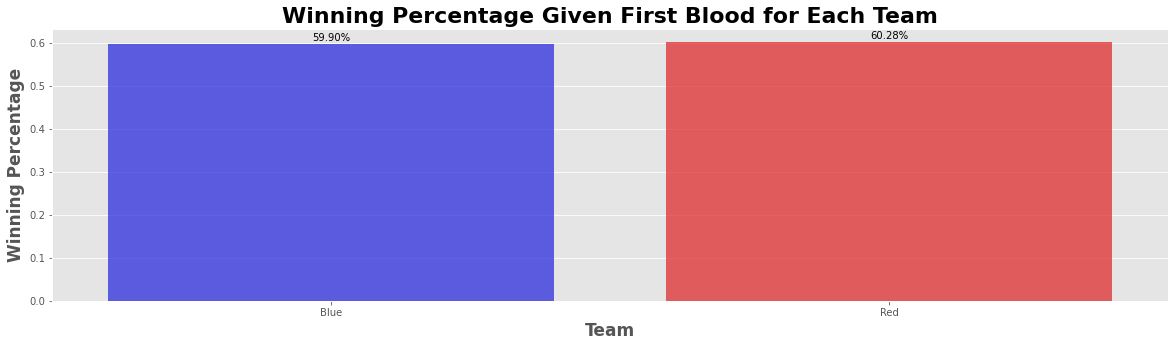

In [20]:
# Create a new plot
plt.figure(figsize=(20, 5))

# performing the calculation described above.
blue_fb_win = len(games[(games['blueFirstBlood'] == 1) & (games['blueWins'] == 1)])
blue_fb = len(games[(games['blueFirstBlood'] == 1)])
red_fb_win = len(games[(games['redFirstBlood'] == 1) & (games['blueWins'] == 0)])
red_fb = len(games[(games['redFirstBlood'] == 1)])
both = [blue_fb_win/blue_fb, red_fb_win/red_fb]

# Creating a barplot and labeling the axes
ax = sns.barplot(x=['Blue', 'Red'], y=both, alpha=0.7, palette=["Blue", "Red"])
plt.xlabel('Team', fontsize=17, fontweight='bold')
plt.ylabel('Winning Percentage', fontsize=17, fontweight='bold')
plt.title('Winning Percentage Given First Blood for Each Team', fontsize=22, fontweight='bold')

# Adding the percentage value above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +.007,
            '{:1.2f}%'.format(100*height),
            ha="center") 

plt.show()

Based on these values, we can see that given a certain team achieves first blood within the first 10 minutes, they are favored to win at about a 60% chance, written P(winning|first blood)=.60. A 60% chance of winning is pretty high, certainly higher than casino odds. It is important to remember however, that it is not guarenteed that a team will achieve a first blood within the first 10 minutes. Therefore, we must continue looking at other features as well.

Next, let's take a look at what effect dragon kills have on the favorability of a team to win. We will be using the same equaltion for conditional probability described above, only this time we will be finding the probability of winning the game given at least one dragon kill. This equation can be written as P(winning|at least one dragon kill).

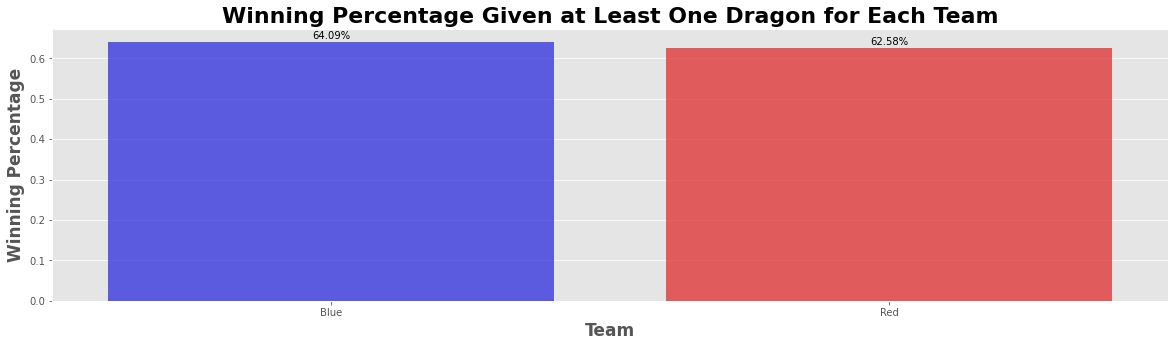

In [21]:
# Create a new plot
plt.figure(figsize=(20, 5))

# Find the probability of winning given at least one
# dragon using conditional probability formuls
blue_fm_win = len(games[(games['blueDragons'] >= 1) & (games['blueWins'] == 1)])
blue_fm = len(games[(games['blueDragons'] >= 1)])
red_fm_win = len(games[(games['redDragons'] >= 1) & (games['blueWins'] == 0)])
red_fm = len(games[(games['redDragons'] >= 1)])
y = [blue_fm_win/blue_fm, red_fm_win/red_fm]

# Plot the results and label the graph
ax = sns.barplot(x=['Blue', 'Red'], y=y, alpha=0.7, palette=["Blue", "Red"])
plt.xlabel('Team', fontsize=17, fontweight='bold')
plt.ylabel('Winning Percentage', fontsize=17, fontweight='bold')
plt.title('Winning Percentage Given at Least One Dragon for Each Team', fontsize=22, fontweight='bold')

# Add the heights of the bars 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +.007,
            '{:1.2f}%'.format(100*height),
            ha="center") 

plt.show()

We can see that this is a more influental statistic for predicting winning a game than first blood is. We can see that P(winning|at least one dragon)=.633 average across both teams. This makes sense because of the impacts that a single dragon can have for the entirety of a game. Dragon is a neutral objective that provides powerful buffs that increase according to the number of dragons you are able to slay. Because of these powerful, permanent, and potentially gamebreaking effects getting a dragon does boost your chances to win tremendously.

Next, we will determine if a dragon or a rift herald is more important by looking at the probability of winning given a rift herald, written as P(winning|at least one rift herald), determined using the conditional probability formula. By contrasting our results with the results obtained for the probability of winning with at least one dragon, we should be able to understand which epic monster is more influential.

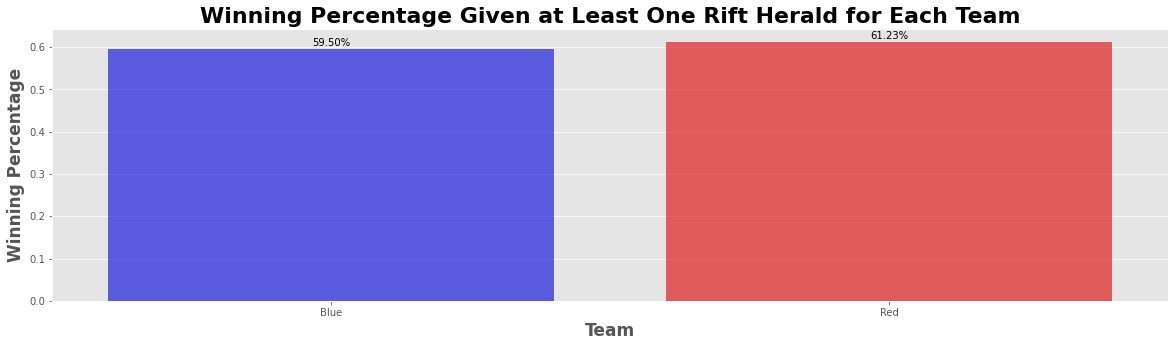

In [22]:
# Create the plot
plt.figure(figsize=(20, 5))

# Calculate the percentage of winning for each team given at least one
# rift herald using the conditional probability formula
blue_fm_win = len(games[(games['blueHeralds'] >= 1) & (games['blueWins'] == 1)])
blue_fm = len(games[(games['blueHeralds'] >= 1)])
red_fm_win = len(games[(games['redHeralds'] >= 1) & (games['blueWins'] == 0)])
red_fm = len(games[(games['redHeralds'] >= 1)])
y = [blue_fm_win/blue_fm, red_fm_win/red_fm]

# Plot the results and label the graph
ax = sns.barplot(x=['Blue', 'Red'], y=y, alpha=0.7, palette=["Blue", "Red"])
plt.xlabel('Team', fontsize=17, fontweight='bold')
plt.ylabel('Winning Percentage', fontsize=17, fontweight='bold')
plt.title('Winning Percentage Given at Least One Rift Herald for Each Team', fontsize=22, fontweight='bold')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +.007,
            '{:1.2f}%'.format(100*height),
            ha="center")

plt.show()

Rift Herald is a neutral objective that, once defeated, will fight for your army and destroy turrets extremely quickly. Given that amount of gold turret kills grant on top of the added territory gained from the turret being dead, securing the Rift Herald is important for determining which team will win the game. However, comparing it to the results that we obtained for dragons, we can conclude that it is not as influential on the game since P(winning|at least one rift herald)=.606 < P(winning|at least one rift dragon)=.633. This makes sense because the dragon gives you improved stats that will last the entire game, while rift herald will only impact the game for a few minutes unless killed earlier. 

Next up, we will determine the P(winning|at least one tower).

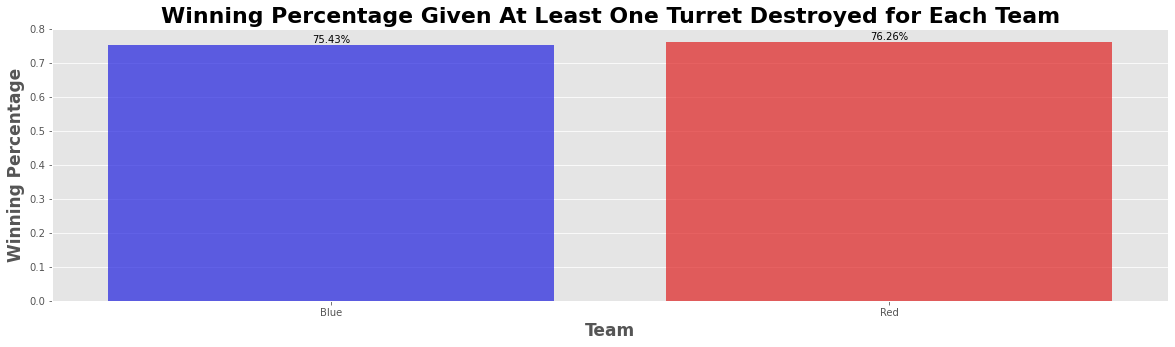

In [23]:
# Setup the graph
plt.figure(figsize=(20, 5))

# Calculate the percentage of winning for each team given at
# least one tower using the conditional probability formula
blue_ft_win = len(games[(games['blueTowersDestroyed'] >= 1) & (games['blueWins'] == 1)])
blue_ft = len(games[(games['blueTowersDestroyed'] >= 1)])
red_ft_win = len(games[(games['redTowersDestroyed'] >= 1) & (games['blueWins'] == 0)])
red_ft = len(games[(games['redTowersDestroyed'] >= 1)])
y = [blue_ft_win/blue_ft, red_ft_win/red_ft]

# Plot the results and label the axes
ax = sns.barplot(x=['Blue', 'Red'], y=y, alpha=0.7, palette=["Blue", "Red"])
plt.xlabel('Team', fontsize=17, fontweight='bold')
plt.ylabel('Winning Percentage', fontsize=17, fontweight='bold')
plt.title('Winning Percentage Given At Least One Turret Destroyed for Each Team', fontsize=22, fontweight='bold')

# Label the bars with their respective percentages
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +.007,
            '{:1.2f}%'.format(100*height),
            ha="center")

plt.show()

Based off the above, it seems that destroying a tower within the first 10 minutes significantly increases your chances of winning more so then securing a dragon, Rift Herald, or First Blood. Intuitively, this makes sense at it is much harder to destroy a tower than it is to get first blood or an epic monster kill. Additionally, with how economy focused League of Legends is, it makes sense that granting global gold on top of map advantage would lead to a victory.

Next lets look at some of the other features to see if we can find a correlation between them. For these features, we will not longer be looking at conditional probability, we will be looking at histograms. If the data is unimodal, that would show us that the feature does not significantly impact win percentage for either team. If the data is bimodal, that means that there is a difference between when blue team normally wins and when the red team normally wins for that feature. This would indicate to us that the feature is significant.

To start, we will be looking at a histogram of Gold Differece. Just a note that gold differences are with respect to the blue team. This means that positive gold differences signify that blue is ahead in gold, and negative gold differences mean that red is ahead.

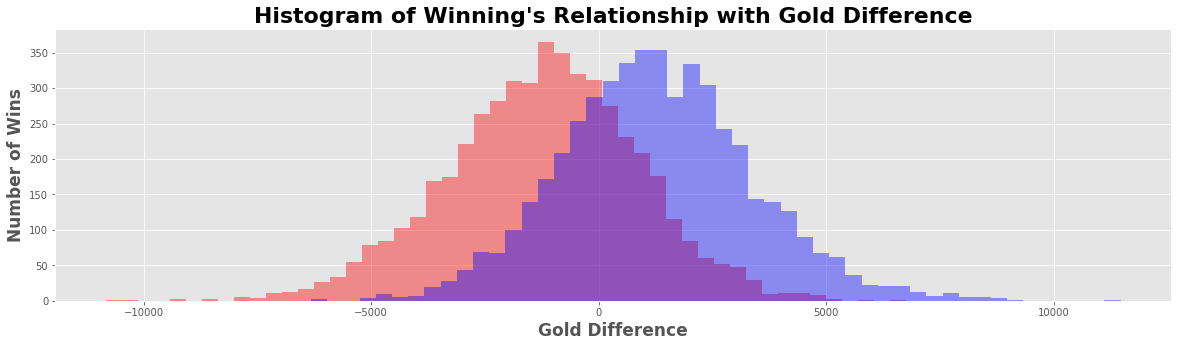

In [24]:
# Setup the graph
plt.figure(figsize=(20, 5))

# Split the data between blue winning and red winning
# and plot with the corresponding color
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueGoldDiff'], bins=50, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('Gold Difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with Gold Difference', fontsize=22, fontweight='bold')

plt.show()

The red section represents times where red team won, blue section represents times the blue team has won, and the purple section represents times where both teams have won before. 
It is clear that once your gold lead for your team hits around the 5000 benchmark, the game is nearly yours!
This data is bimodal and that is expected for gold difference. The more gold lead that blue has, the more probabilistic it is that they will win. The same goes for red. Therefore, gold lead does have a significant impact. Of course there are times when teams win even when they are very behind in gold, but they are few and far between (and usually due to human error)

Next, let's take a look at experience.

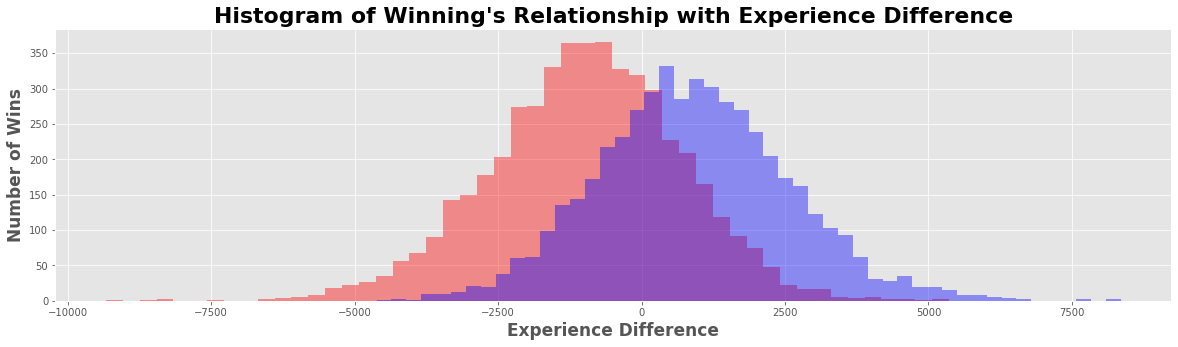

In [25]:
# Get a new graph
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueExperienceDiff'], bins=50, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('Experience Difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with Experience Difference', fontsize=22, fontweight='bold')

plt.show()

The red section represents times where red team won, blue section represents times the blue team has won, and the purple section represents times where both teams have won before. 
It is clear that having an experience lead will result in having a lead for your team since the data is bimodal. For both blue and red team, there is a tendency to win if you have the experience lead, with the chance to win increasing as you get a higher and higher experience lead. At around a 3750 gold experience lead for your team, you can expect to win the game. As such, experience is an important factor in determining if you will win a game of League.

Now, let's look at KDA difference. 

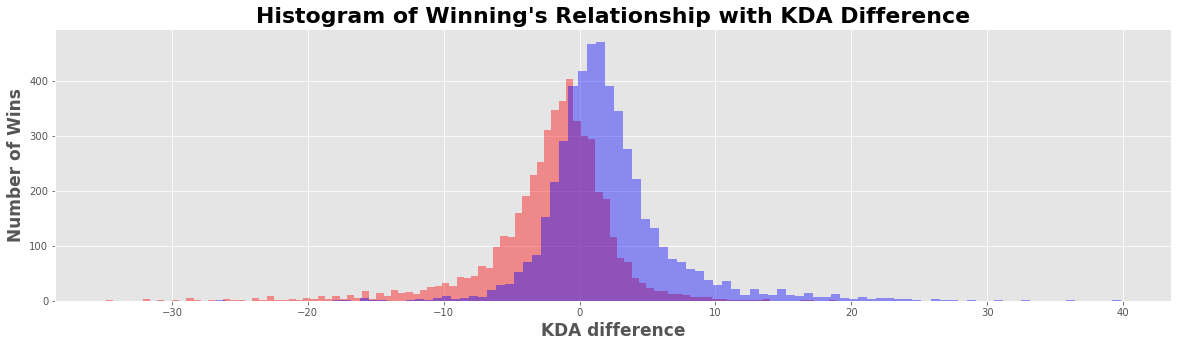

In [26]:
# Start up a new plot
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueKDADiff'], bins=100, kde=False, color='red' if color == 0 else 'blue')

# Label the graph
plt.xlabel('KDA difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with KDA Difference', fontsize=22, fontweight='bold')

plt.show()

This data is barely bimodal (looks basically unimodal) which indicates that KDA is less important than other factors. While it is clear based on the graph that having a KDA lead over your opponent will result in wins, the cutoff is not as bold as it is with the other metrics previously mentioned. It appears at slightly above 10 KDA differenece for your team, you can expect to win. But for the data within those bounds, it is not as clear cut as to which team will win as it is with our other data. That being said, KDA is a factor in determining if you will win the game.

Next, we will be looking at CS.

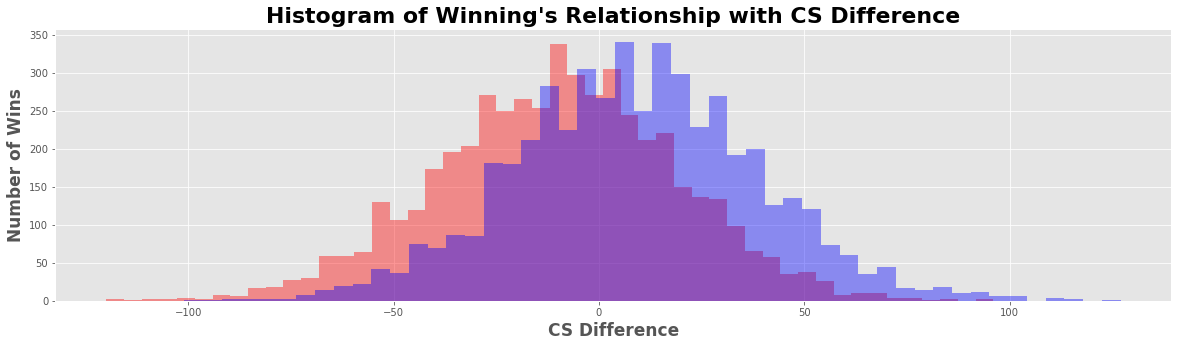

In [27]:
# Start a new plot
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueCSDiff'], bins=50, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('CS Difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with CS Difference', fontsize=22, fontweight='bold')

plt.show()

This data looks barely bimodal, indicating that there is a marginal importance on CS in a win. Although a CS lead is definitely a non-trivial factor due to the amount of gold that CS provides, it is clear that it is completely possible for upsets to occur despite a CS lead. A CS lead of around 80 will guarantee your team a win, but as with KDA, there is a chance for a slight lead to not really have an impact on winning the game. There is a lot of overlap in the center meaning that unless you have a very sizeable lead, the statistic is not the most accurate in predicting who will win.

The next feature we will be taking a look at is jungle CS, which is the amount of jungle minions killed.

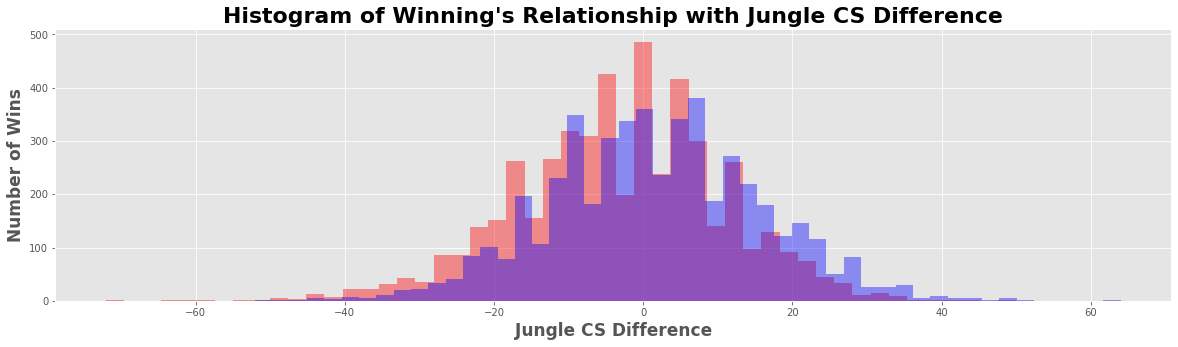

In [28]:
# Setup a new graph
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueJGCSDiff'], bins=50, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('Jungle CS Difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with Jungle CS Difference', fontsize=22, fontweight='bold')

plt.show()

This graph looks unimodal, indicating a insignificant impact on whether or not a team will win a game. Jungle CS seems to have even less impact then regular, across the board, team CS. There is a lot of purple cross section, meaning that there were many instances where despite a jungle CS lead, the team at a disadvantage in this metric won anyways. Due to this uncertaintly and the unimodal nature of the graph, it is in our best interest to remove it from the model as we do not want to add any unecessary complexity to our model.

In [29]:
# Removing Jungle CS as a feature
games.drop(['blueJGCSDiff'], axis=1, inplace=True)

The next feature that we will be taking a look at is wards.

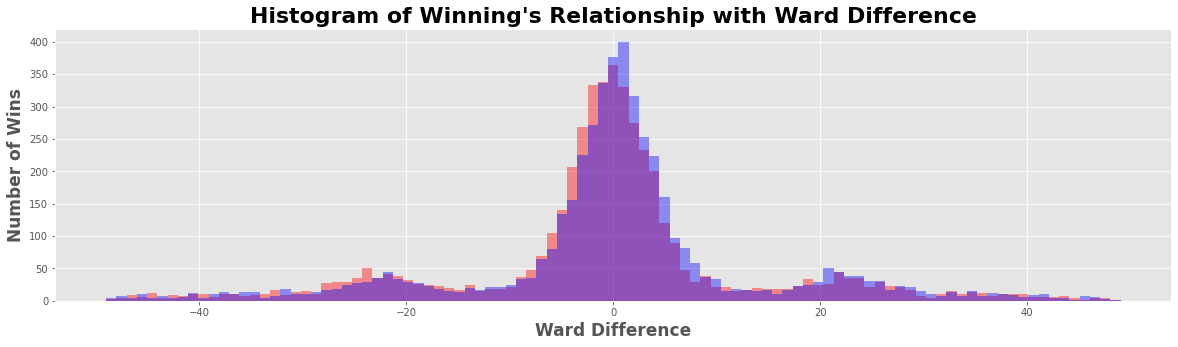

In [30]:
# Start the graph
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    data = data[(data['blueWardDiff'] < 50) & (data['blueWardDiff'] > -50)]
    sns.distplot(data['blueWardDiff'], bins=99, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('Ward Difference', fontsize=17, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with Ward Difference', fontsize=22, fontweight='bold')

plt.show()

This data is very unimodal. Ward difference seems to be completely insignificant, and therefore we will remove it to reduce excess complexity for the ML model. The sheer amount of majority purple area implies that although having a vision advantage from wards may feel important, it is not very accurate in determining who will win a game of league, with no real value to guarantee a won game. 

In [31]:
games.drop(['blueWardDiff'], axis=1, inplace=True)

Finally, let's look at the last feature, wards destroyed difference.

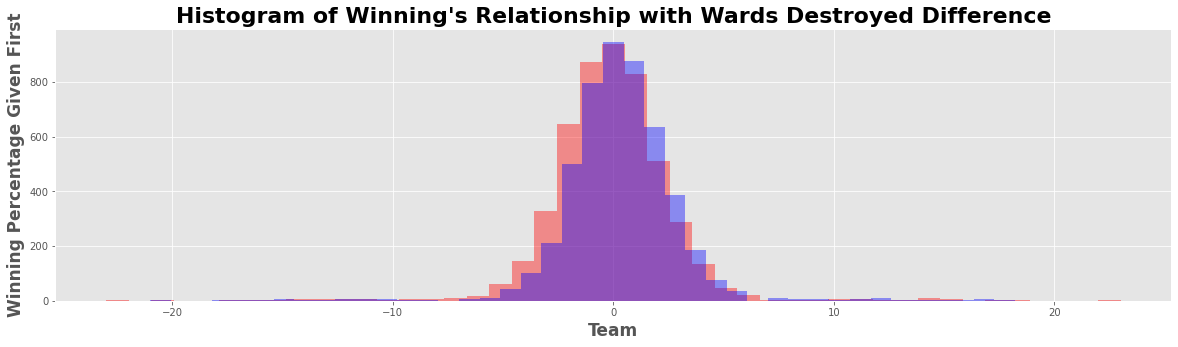

In [32]:
# Start the graph
plt.figure(figsize=(20, 5))

# Split the data between red winning and blue winning
# and plot (using different colors for different teams)
for color, data in games.groupby('blueWins'):
    sns.distplot(data['blueDestWardDiff'], bins=45, kde=False, color='red' if color == 0 else 'blue')

# Label the axes
plt.xlabel('Team', fontsize=17, fontweight='bold')
plt.ylabel('Winning Percentage Given First', fontsize=17, fontweight='bold')
plt.title('Histogram of Winning\'s Relationship with Wards Destroyed Difference', fontsize=22, fontweight='bold')

plt.show()

Once again, since the graph is very unimodal, we are going to get rid of it. With a distribution like that, all it would do is add uneeded complexity.

In [33]:
games.drop(['blueDestWardDiff'], axis=1, inplace=True)

## What did we learn from EDA

Overall, we have a good idea as to what influences winning a game of League of Legends. It seems that getting a tower, dragon, rift herald or first blood within the first 10 minutes of the game make your chances of winning the game at least 60% which is very good. Aditionally, we concluded that gold difference and experience difference contribute the most to a teams win. KDA difference, CS difference, and ward difference matter, but not near as much as the first two. We further concluded that jungle CS difference, ward difference, and wards destroyed difference do not matter at all and opted to remove them from the dataset to avoid adding any unecessary complexity for when we train our ML models.

## Let's Try to Predict the Outcome

In this section, we are going to focus on trying to predict which team will win a game of League of Legends when given the first 10 minutes of data. We will be testing out many different models, attempting to find the one that gives us the best results. After this model is determined, we will attempt to improve it even further by fine-tuning it's hyperparameters.

The first thing that we have to do is import the models that we want.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

We will be defining a function that we can use later to return us a dict of all of our untrained models. This will be important for later when we do 10-fold cross validation as we do not want to refit an already fit model with new training data. 

Here we will also define two dicts, one to hold all of the scores of the different models and another one to hold all of the errors.

In [35]:
# Function to return newly created models
def get_fresh_models():
    return {
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Gaussian Naive Bayes': GaussianNB(),
        'Support Vector Classifier': SVC(max_iter=10000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Gradient Boost': GradientBoostingClassifier(),
        'RandomForest': RandomForestClassifier(),
        'BaggingClassifier': BaggingClassifier(),
        'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    }

# Dict to hold scores
scores = {
    'Decision Tree': np.zeros(10),
    'Logistic Regression': np.zeros(10),
    'Gaussian Naive Bayes': np.zeros(10),
    'Support Vector Classifier': np.zeros(10),
    'K-Nearest Neighbors': np.zeros(10),
    'Gradient Boost': np.zeros(10),
    'RandomForest': np.zeros(10),
    'BaggingClassifier': np.zeros(10),
    'LinearDiscriminantAnalysis': np.zeros(10),
}

# Dict to hold errors
errors = {
    'Decision Tree': np.zeros(10),
    'Logistic Regression': np.zeros(10),
    'Gaussian Naive Bayes': np.zeros(10),
    'Support Vector Classifier': np.zeros(10),
    'K-Nearest Neighbors': np.zeros(10),
    'Gradient Boost': np.zeros(10),
    'RandomForest': np.zeros(10),
    'BaggingClassifier': np.zeros(10),
    'LinearDiscriminantAnalysis': np.zeros(10),
}

Now that we have our models, we are actually going to start training and testing them to determine which one is the best. To do this, we will use 10-fold cross validation. This means that we are going to split up our data into 10 groups, each group containing both training and testing data. Then, for each of these 10 fold we will train all of the models on the training data and score them with the testing data. Using these 10 scores, we will determine which performed the best.

In [36]:
# Import the necessary functions for training, testing, and evaluating
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Create a standard scaler so we can standardize the dataset
ss = StandardScaler()

# Split the features from the correct output and scale the features
X = games[[i for i in list(games.columns) if i != 'blueWins']].values
X = ss.fit_transform(X)
y = games['blueWins'].values

# Declare a KFold object and loop through each fold, training and 
# testing every model
kf = KFold(n_splits=10)
fold = -1
for train_index, test_index in kf.split(X):
    fold += 1
    
    # Get the train and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Get new fresh models
    models = get_fresh_models()
    
    # Train each model and update their score/error for this iteration
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name][fold] = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        errors[name][fold] = mean_squared_error(y_true=y_test, y_pred=y_pred)

Now we have the results which are scores and errors for each models for each of the 10 folds. Let's get that into a more readable format for us so we can easily determine which is the best.

In [37]:
# Create a new dataframe to display the analysis
analysis_df = pd.DataFrame()

# For each model, calculate the min score, max score, average score,
# min error, max error, and average error and add it in a column
# with the name of the model
for name, values in scores.items():
    min_score = values.min()
    max_score = values.max()
    avg_score = values.mean()
    std_score = values.std(ddof=1)
    min_mse = errors[name].min()
    max_mse = errors[name].max()
    avg_mse = errors[name].mean()
    std_mse = errors[name].std(ddof=1)
    analysis_df[name] = np.array([min_score, avg_score, max_score, std_score, min_mse, avg_mse, max_mse, std_mse])

# Transpose the dataframe so the columns are now the rows
analysis_df = analysis_df.T

# Create the column names and sory by average score 
analysis_df.columns = ['Min Score', 'Avg Score', 'Max Score', 'STD Score', 'Min MSE', 'Avg MSE', 'Max MSE', 'STD MSE']
analysis_df = analysis_df.sort_values(by = 'Avg Score', ascending=False) 

analysis_df

Min Score  Avg Score  Max Score  STD Score  \
Logistic Regression          0.710233   0.731752   0.755061   0.012936   
LinearDiscriminantAnalysis   0.710233   0.730942   0.755061   0.013933   
Gradient Boost               0.713273   0.728210   0.742915   0.009830   
Support Vector Classifier    0.713563   0.724870   0.750000   0.010861   
Gaussian Naive Bayes         0.699393   0.720822   0.741903   0.013211   
RandomForest                 0.697368   0.713431   0.743927   0.014216   
BaggingClassifier            0.670040   0.696224   0.712551   0.015048   
K-Nearest Neighbors          0.680162   0.694806   0.710526   0.009550   
Decision Tree                0.616397   0.639841   0.659919   0.016278   

                             Min MSE   Avg MSE   Max MSE   STD MSE  
Logistic Regression         0.244939  0.268248  0.289767  0.012936  
LinearDiscriminantAnalysis  0.244939  0.269058  0.289767  0.013933  
Gradient Boost              0.257085  0.271790  0.286727  0.009830  
Support Vector Classifier   0.250000  0.275130  0.286437  0.010861  
Gaussian Naive Bayes        0.258097  0.279178  0.300607  0.013211  
RandomForest                0.256073  0.286569  0.302632  0.014216  
BaggingClassifier           0.287449  0.303776  0.329960  0.015048  
K-Nearest Neighbors         0.289474  0.305194  0.319838  0.009550  
Decision Tree               0.340081  0.360159  0.383603  0.016278

Looks like Logistic Regression is the best model at predicting wins for us, and decision trees are the weakest. 

Logistic Regression is so strong because of the precautions we took with our data. For one we made sure that no columns were just linear combinations of one another. Additionally, we made sure to get rid of some variables that could have created a lot of strange conclusions such as ward kills and adding a variable with that much variance would have seriously threw things around. Additionally, our value we are trying to determine which is wins is categorical with a 0 attached for loses and 1 attached for wins which is the ideal situation for logistic regression. We also are able to see from the earlier charts and graphs we made earlier that the data is predominantly linear in determining a win. For example, the gold difference and win ratio histogram appears extremely linear, with a gold difference closer to zero resulting in essentially a coin flip, but as you spread out from that center, you see a steady and linear trend for either teams win rate increasing as you give them a higher and higher gold lead. The fact that the logistic regression model fits our data so well implies that the majority of the variables we took into account are in fact linearly related with win rate!

Decision Trees might be some of the weakest because of the sheer amount of variables we are considering. Although there are some variables we discussed earlier like the Jungle CS difference which does not do nearly as good of a job of predicting a win as say, having a turret destroyed, that variable is taken account in the Decision Tree which may result in overfitting. That being said, Jungle CS difference is not arbitrary enough to get rid of, and is still a tangible advantage that can be gained, as such it is an important metric to consider. As such, just given our data, Decision Trees fall short of being very good at predicting a win.
Additionally, because League of Legends is such a high-variance game, it may result in the Decision Tree making conclusions that are not entirely correct 100% of the time. 

Lets take a closer look at it and see if we can get it any better by using GridSearchCV to compute the optimum values for each of our hyperparameters.

In [47]:
# Import GridSearchCV for finding hyperparameters
from sklearn.model_selection import GridSearchCV

# Define our model
model = LogisticRegression()

# Create our dist of params that we want to try 
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'max_iter': list(range(100,10000,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Find the hyperparameters
better_model = GridSearchCV(model, param_grid=params, refit=True, cv=10)
better_model.fit(X, y)

# Print the average accuracy of the model
print('Average Accuracy: %.4f' % better_model.best_score_)

KeyboardInterrupt: 

Well, that is not as much of an improvement as we were hoping for. However, 0.02% of an increase is still an increase though! I think that this is the best that we can do for League of Legends given the first 10 minutes of data. The reasoning for this little improvement is most likely due to the unpredictability of League of Legends. No matter how much more a team is favored to win, humans are not perfect and any small mistake can change the tides in an otherwise won game.

## Conclusion

League is a complex game, and although it is probably not likely to be 100% accurate in determining who will win a game of League just based off the first 10 minutes, we were pretty accurate. We were able to determine pretty strong predictors for whether a team will win with our discoveries such as if a team gets a dragon in the first 10 minutes, that is a decent predictor that they will win the game.

There are a lot of different factors at play, and even when a game looks like it is won for one team, human error can always turn the tides. That is why it is not possible to get better accuracy from only the fist 10 minutes. 

Our next goal is to predict which team will win at any given time during a game, and see how accurate that can be over time. But that is in the future. For now, from the first 10 minutes in a diamond game, a 75.5% accuracy is pretty good given the unpredictible nature of League of Legends. I would love to try this out with my own games, however, neither me nor my partner are Diamond because we suck at the game. I hope you found this tutorial helpful and maybe you will be able to test it out on your own games! 